In [26]:
%matplotlib inline
import pandas as pd
from zipfs_law import inputoutput
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [8]:
out_path, raw_path = inputoutput.create_output_directories("../output/")

In [11]:
df = pd.read_csv(out_path / "summary.csv").set_index("name")

In [12]:
df

,total_words,distinct_words,alpha,C
name,,,,
frakenstein,78024,7541,1.114925,6.168187
dracula,160664,10616,1.086088,6.969854
jayne-eyre,185390,17498,0.970275,11.911448


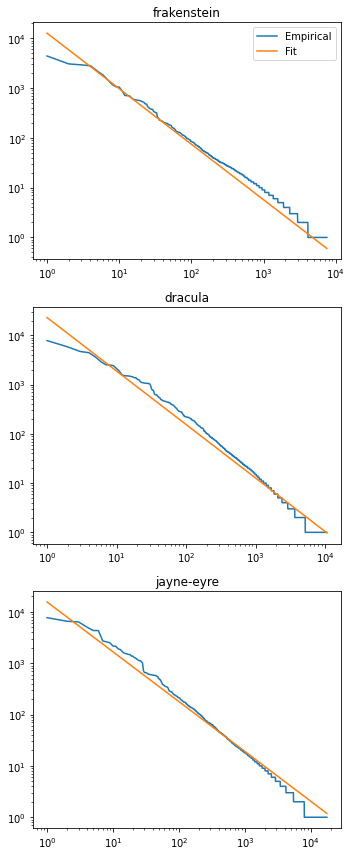

In [33]:
most_common = {}

fig, ax = plt.subplots(len(df), figsize=(5, 4*len(df)))

for idx, (book, row) in enumerate(df.iterrows()):
    ax_ = ax[idx]
    df_c = pd.read_csv(raw_path / f"{book}.csv")
    
    rank = np.arange(df_c.shape[0]) + 1
    ax_.loglog(rank, df_c.freq, label="Empirical")
    ax_.loglog(rank, df_c.freq.sum() / row.C * rank ** (-row.alpha), label="Fit")
    
    ax_.set_title(book)
    ax_.set
    
    if idx == 0:
        ax_.legend()
        
fig.tight_layout()